# EDA

Exploratory Data Analysis (EDA) is the process of analyzing data sets to summarize their main characteristics, often with visual methods.

Checklist:

* Data types
* Missing values
* Duplicates
* Class imbalance
* Data distribution
* Outliers
* Correlation
* Feature engineering
    * Feature importance
    * Feature scaling
    * Feature selection
* Model selection

## Packages

* pandas
* Seaborn
* Matplotlib
* Numpy
* Scikit-learn
* scipy
* statsmodels

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
data = pd.read_csv("../assets/amazon_reviews.csv")

In [3]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


## Data Types

In [27]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

## Missing Values

In [15]:
data.isna().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

## Duplicates

* find duplicates `verified_reviews`

In [21]:
duplicated = data["verified_reviews"].duplicated()

In [22]:
data[duplicated]

,rating,date,variation,verified_reviews,feedback
101,5,30-Jul-18,Heather Gray Fabric,Love it!,1
151,5,30-Jul-18,Sandstone Fabric,Love it,1
183,3,29-Jul-18,Heather Gray Fabric,,1
219,5,29-Jul-18,Sandstone Fabric,,1
220,5,29-Jul-18,Heather Gray Fabric,Cool,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


## Class Imbalance

class imbalance is when the distribution of classes in the dataset is not uniform.

* find class imbalance in the columns you are interested in

<Axes: xlabel='rating'>

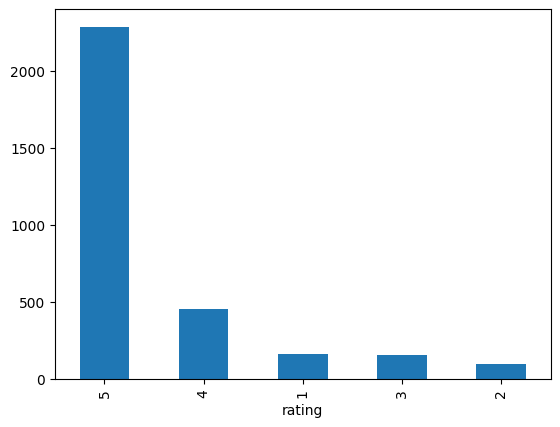

In [11]:
data["rating"].value_counts().plot(kind="bar")

<Axes: xlabel='rating', ylabel='count'>

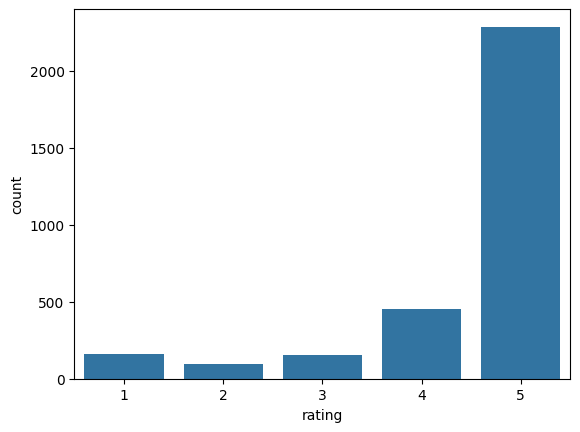

In [12]:
sns.barplot(data["rating"].value_counts())

<Axes: xlabel='feedback'>

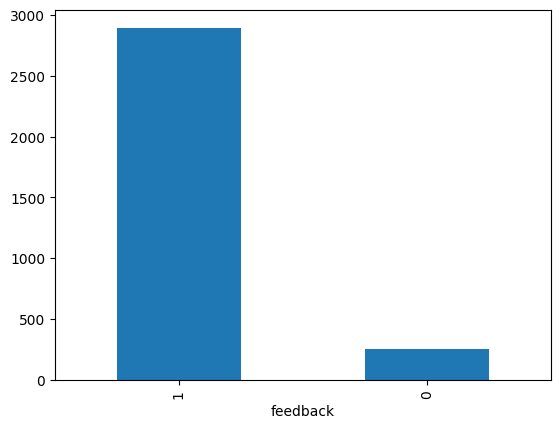

In [24]:
data["feedback"].value_counts().plot(kind="bar")

<Axes: xlabel='variation'>

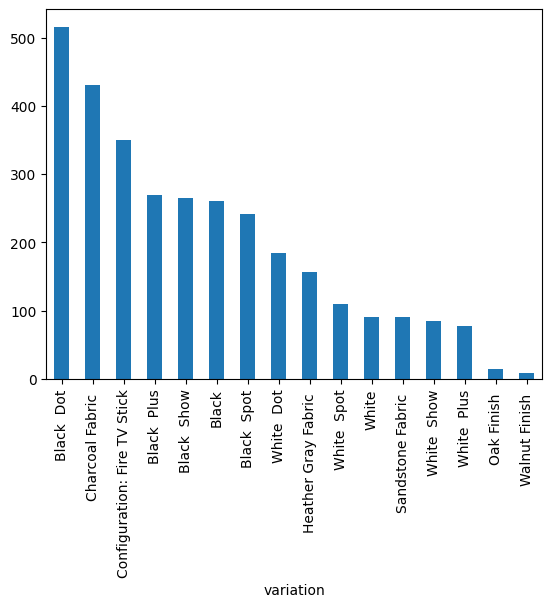

In [25]:
data["variation"].value_counts().plot(kind="bar")

<Axes: xlabel='feedback'>

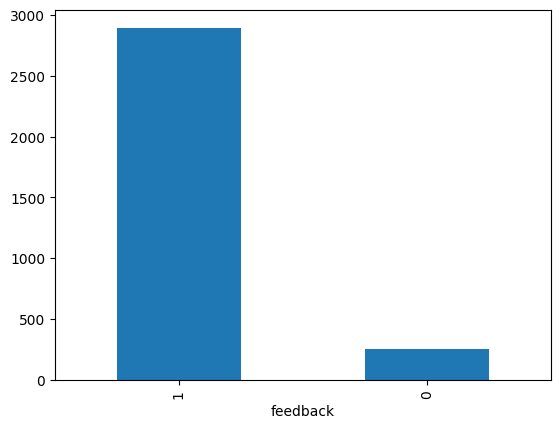

In [29]:
data["feedback"].value_counts().plot(kind="bar")

## Data Distribution

Data distribution is the spread of data in a dataset.

* find the distribution of the columns you are interested in

In [36]:
data["date"].value_counts()


date
30-Jul-18    1603
29-Jul-18     482
28-Jul-18     250
26-Jul-18      85
31-Jul-18      81
             ... 
2-Jun-18        2
9-Jun-18        1
29-May-18       1
4-Jun-18        1
13-Jun-18       1
Name: count, Length: 77, dtype: int64

<Axes: xlabel='date'>

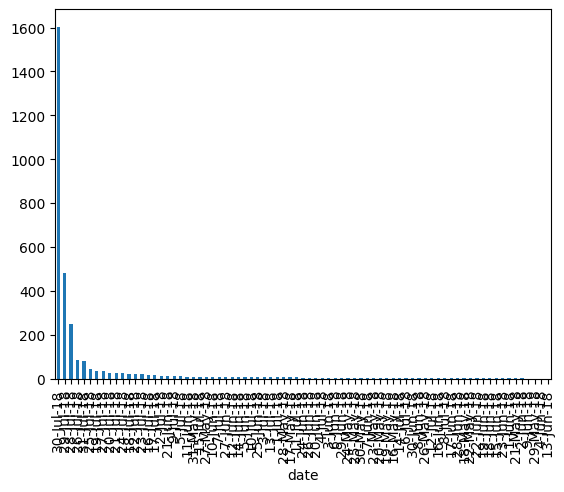

In [37]:
data["date"].value_counts().plot(kind="bar")

## Outliers

One way to detect outliers is to use the IQR method.

The IQR method is based on the IQR score. The IQR score is the difference between the 75th percentile and the 25th percentile of the data. 

The IQR score is then multiplied by 1.5 and added to the 75th percentile and subtracted from the 25th percentile. 

Any data points that fall below the 25th percentile - 1.5 * IQR score or above the 75th percentile + 1.5 * IQR score are considered outliers.

In [42]:
Q1 = data["rating"].quantile(0.25)

In [44]:
Q3 = data["rating"].quantile(0.75)

In [45]:
IQR = Q3 - Q1

In [46]:
lower_bound = Q1 - 1.5 * IQR

In [47]:
upper_bound = Q3 + 1.5 * IQR

In [48]:
outliers = data[(data["rating"] < lower_bound) | (data["rating"] > upper_bound)]

In [49]:
outliers

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


## Correlation

In [51]:
data.select_dtypes(include=["int64", "float64"]).corr()

,rating,feedback
rating,1.000000,0.861968
feedback,0.861968,1.000000


## Feature Engineering

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.

* Feature importance

 * Question: Does stop words ... ?

 * Question: Does the length of the review/text ... ?

# Practice

For each dataset, perform EDA:

* [Amazon Reviews](../assets/amazon_reviews.csv)
* [Twitter](../assets/twitter.csv)
* [Spam](../assets/spam.csv)
* [IMDB](../assets/IMDB%20Dataset.csv)

Create a new notebook called `<Data Set Name>_EDA.ipynb` and save it in the `notebooks/EDA` directory.